In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd

### How to decay a number over time

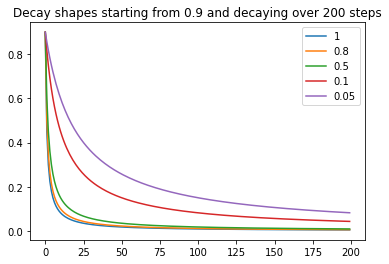

In [11]:
start = 0.9
# decay_factor = 0.5
period = 200

for decay_factor in [1, 0.8, 0.5, 0.1, 0.05]:
    y = []
    x = []
    for i in range(period):
        x.append(i)
        y.append(start/(1 + decay_factor*i))

    plt.plot(x, y, label=decay_factor)

plt.legend()
plt.title("Decay shapes starting from 0.9 and decaying over 200 steps")
plt.show()

### Plot how a single run went

In [48]:
log_file = "model_checkpoints/2023_03_02_15_56.json"
with open(log_file, 'r') as f:
    log = json.load(f)
log["rewards"] = [int(i) for i in log["rewards"]]
log.keys()

dict_keys(['params', 'rewards', 'losses', 'timers'])

dict_keys(['board_to_state', 'train', 'create_train_tensors', 'sample_memory', 'calculate_qs', 'episodes'])
Timer BOARD_TO_STATE is empty


C:\Users\HV51OU\AppData\Local\Temp\ipykernel_10344\1766421428.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


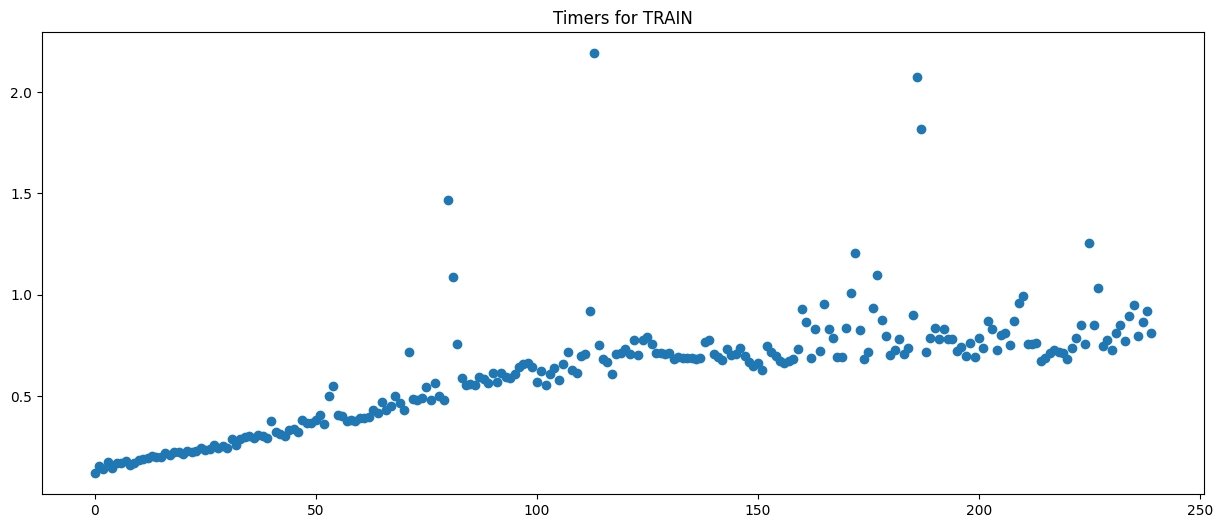

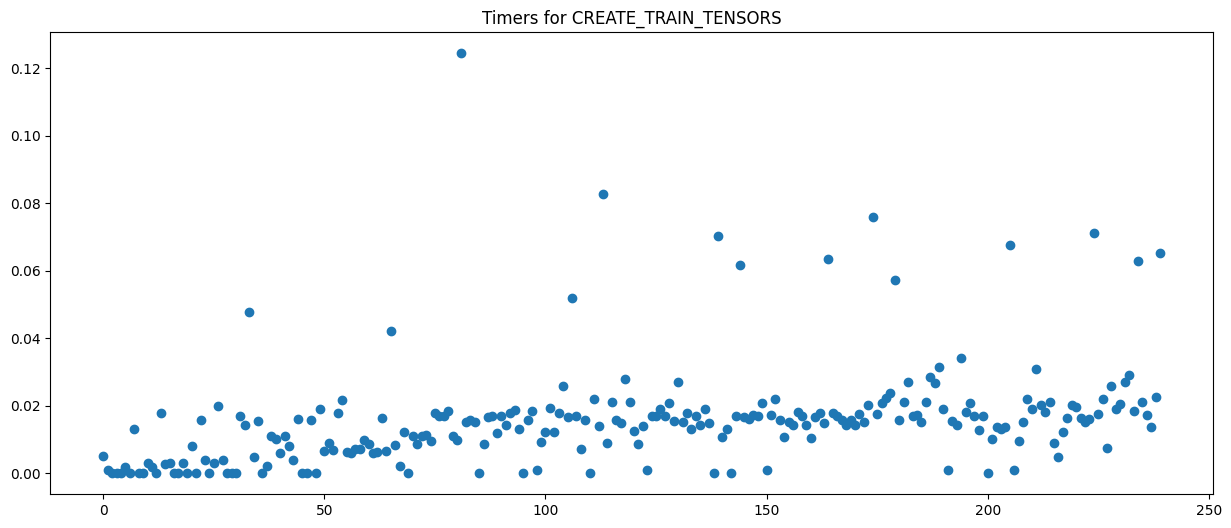

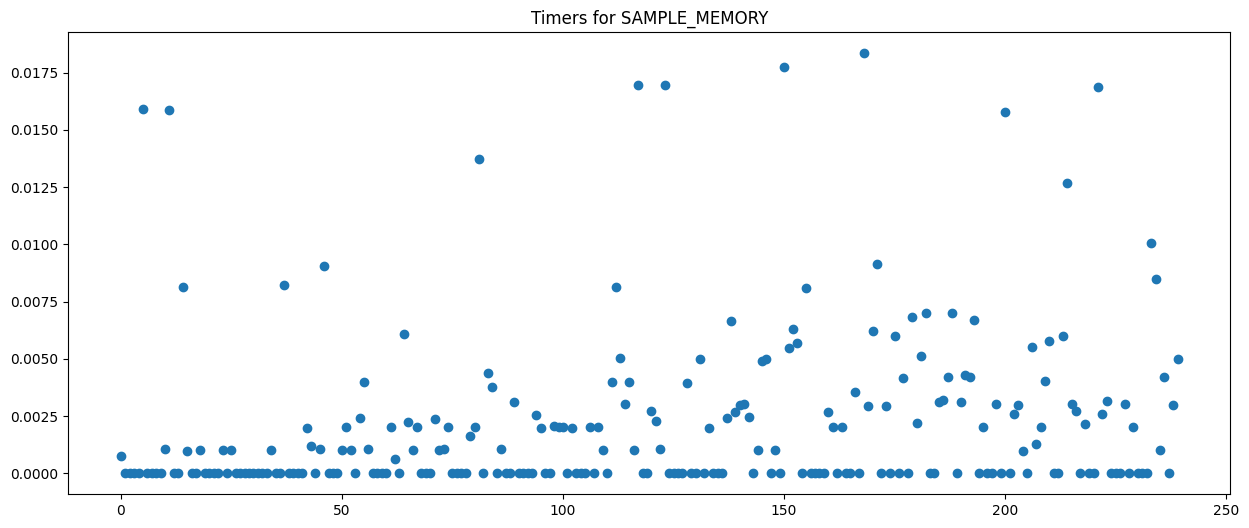

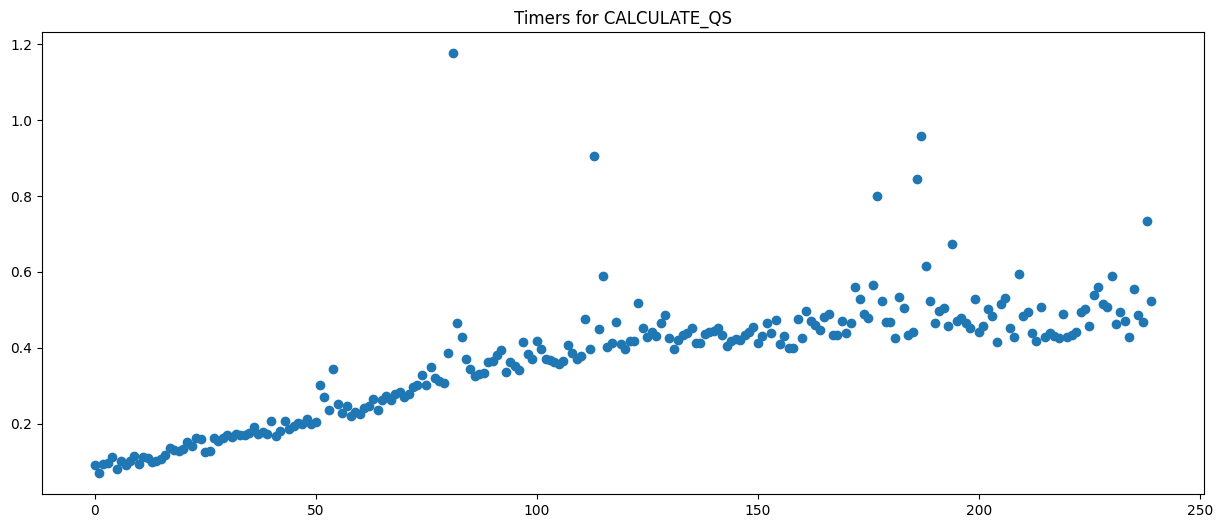

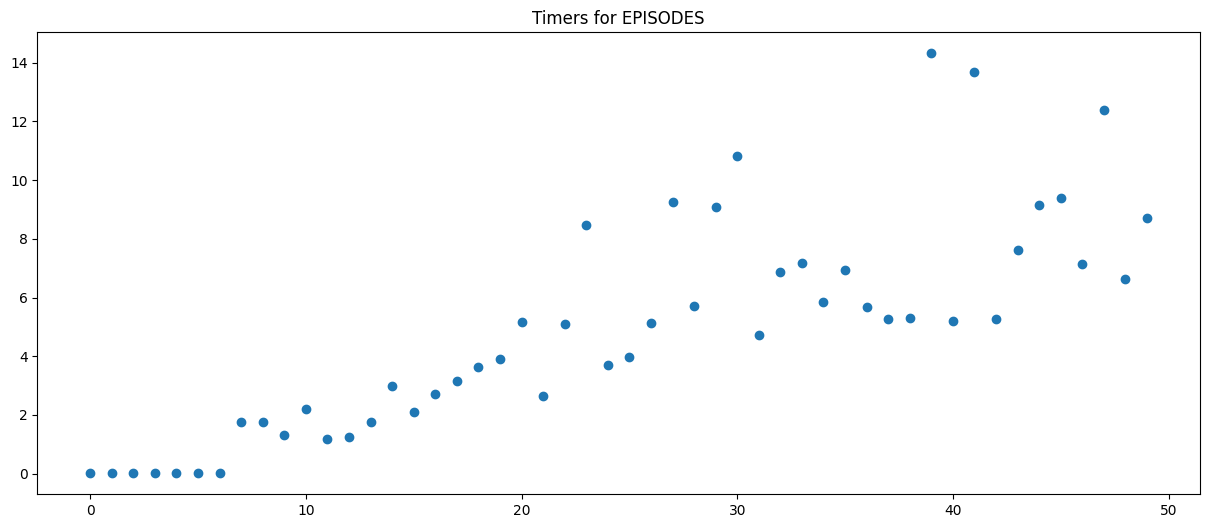

In [68]:
from datetime import timedelta

def str_to_sec(delta: str):
    splits = delta.split(':')
    return (float(splits[0]) * 60 * 60) + (float(splits[1]) * 60) + float(splits[2])

timers = log['timers']
print(timers.keys())
for key in timers.keys():
    if len(timers[key]) == 0:
        print(f"Timer {key.upper()} is empty")
        continue
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    ax.scatter(
        pd.Series([str_to_sec(t) for t in timers[key]], dtype="float32").index,
        pd.Series([str_to_sec(t) for t in timers[key]], dtype="float32"),
    )
    ax.set_title(f"Timers for {key.upper()}")
    fig.show()

/var/folders/2q/pw161cg177b56r2ms0fh9yrh0000gs/T/ipykernel_2865/2511496599.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


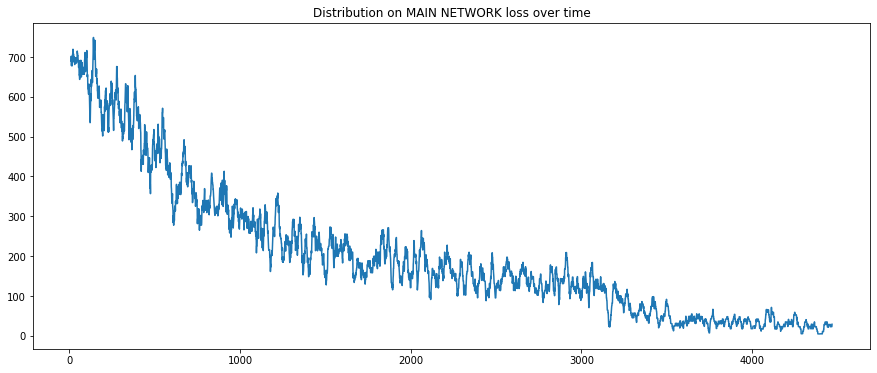

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(
    # [i for i, _ in enumerate(log["losses"])],
    pd.Series(log["losses"]).rolling(20, center=True).mean().dropna(),
)
ax.set_title("Distribution on MAIN NETWORK loss over time")
fig.show();

/var/folders/2q/pw161cg177b56r2ms0fh9yrh0000gs/T/ipykernel_2865/1245256785.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


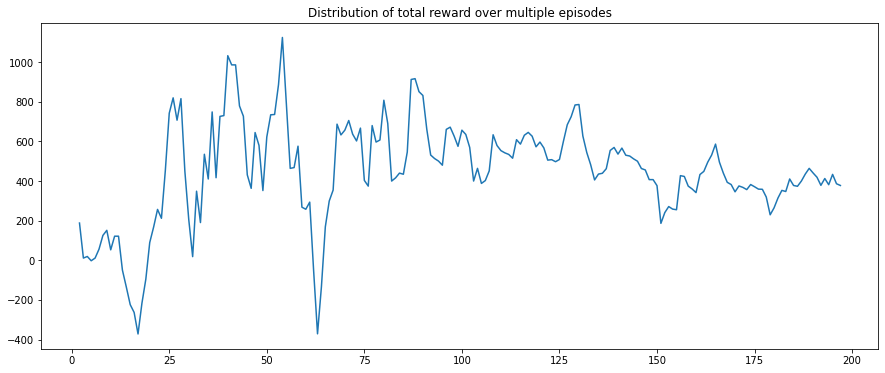

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(
    # [i for i, _ in enumerate(log["losses"])],
    pd.Series(log["rewards"]).rolling(5, center=True).mean().dropna(),
)
ax.set_title("Distribution of total reward over multiple episodes")
fig.show();